In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Books.csv to Books.csv


In [3]:
from google.colab import files
uploaded=files.upload()

Saving Users.csv to Users.csv


In [6]:
from google.colab import files
uploaded=files.upload()

Saving Ratings.csv to Ratings.csv


In [7]:
books= pd.read_csv("Books.csv")
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
books.shape

(271360, 8)

### User dataset

In [10]:
users= pd.read_csv("Users.csv")
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
users.shape

(278858, 3)

In [13]:
users.describe()

User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000

### Ratings dataset

In [14]:
ratings= pd.read_csv("Ratings.csv")
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [16]:
ratings.shape

(1149780, 3)

## Data Preparation (Data Cleaning and Feature Engineering)
Let's take first book_data dataset

In [17]:
# droping the url
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)

In [18]:
# replacing '-' with '_' and features name in lower case
books.columns= books.columns.str.strip().str.lower().str.replace('-', '_')
users.columns= users.columns.str.strip().str.lower().str.replace('-', '_')
ratings.columns= ratings.columns.str.strip().str.lower().str.replace('-', '_')

In [19]:
pd.set_option('display.max_colwidth', -1)

In [20]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271359 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [21]:
print(books.isnull().sum())

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64


In [22]:
# nan values in particular column
books.loc[(books['book_author'].isnull()),: ]

isbn                                                book_title  \
187689  9627982032  The Credit Suisse Guide to Managing Your Personal Wealth   

       book_author year_of_publication                       publisher  
187689  NaN         1995                Edinburgh Financial Publishing

In [23]:
#Filling the null value
books.loc[187689, 'book_author'] = 'Larissa Anne Downes'

In [24]:
# nan values in particular column
books.loc[(books['publisher'].isnull()),: ]

isbn       book_title      book_author year_of_publication  \
128890  193169656X  Tyrant Moon      Elaine Corvidae  2002                 
129037  1931696993  Finders Keepers  Linnea Sinclair  2001                 

       publisher  
128890  NaN       
129037  NaN

In [25]:
#Replacing NaNs with correct  values
books.loc[128890, 'publisher'] = 'Mundania Press LLC'
books.loc[129037, 'publisher'] = 'Bantam'

We pointed null values in 'book_author' and 'publisher' feature.

Let's look at the unique years to realize the time period 

In [26]:
# getting unique value from 'year_of_publication' feature
books['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [27]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
books[books['year_of_publication'] == 'DK Publishing Inc'] 

isbn  \
209538  078946697X   
221678  0789466953   

                                                                                                         book_title  \
209538  DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"          
221678  DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"   

       book_author year_of_publication  \
209538  2000        DK Publishing Inc    
221678  2000        DK Publishing Inc    

                                                           publisher  
209538  http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg  
221678  http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg

In [28]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title' 
books[books['year_of_publication'] == 'Gallimard']

isbn  \
220731  2070426769   

                                                                      book_title  \
220731  Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"   

       book_author year_of_publication  \
220731  2003        Gallimard            

                                                           publisher  
220731  http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg

There has to make some correction in three rows as you can see in above output. Let's fix it.

In [29]:
books.loc[221678]

isbn                   0789466953                                                                                                 
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
book_author            2000                                                                                                       
year_of_publication    DK Publishing Inc                                                                                          
publisher              http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg                                               
Name: 221678, dtype: object

In [30]:
books.loc[209538]

isbn                   078946697X                                                                                          
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
book_author            2000                                                                                                
year_of_publication    DK Publishing Inc                                                                                   
publisher              http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg                                        
Name: 209538, dtype: object

In [31]:
books.loc[220731]

isbn                   2070426769                                                              
book_title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
book_author            2003                                                                    
year_of_publication    Gallimard                                                               
publisher              http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg            
Name: 220731, dtype: object

In [32]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [33]:
replace_df_value(books, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(books, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(books, 209538, 'year_of_publication', 2000)
replace_df_value(books, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(books, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(books, 221678, 'book_author', 'James Buckley')
replace_df_value(books, 221678, 'year_of_publication', 2000)
replace_df_value(books, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(books, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(books, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(books, 220731, 'year_of_publication', 2003)
replace_df_value(books, 220731, 'publisher', 'Gallimard')

isbn  \
0       0195153448   
1       0002005018   
2       0060973129   
3       0374157065   
4       0393045218   
...            ...   
271355  0440400988   
271356  0525447644   
271357  006008667X   
271358  0192126040   
271359  0767409752   

                                                                                                                            book_title  \
0       Classical Mythology                                                                                                              
1       Clara Callan                                                                                                                     
2       Decision in Normandy                                                                                                             
3       Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It                               
4       The Mummies of Urumchi                                                                                                           
...                        ...                                                                                                           
271355  There's a Bat in Bunk Five                                                                                                       
271356  From One to One Hundred                                                                                                          
271357  Lily Dale : The True Story of the Town that Talks to the Dead                                                                    
271358  Republic (World's Classics)                                                                                                      
271359  A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin   

                 book_author year_of_publication  \
0       Mark P. O. Morford    2002                 
1       Richard Bruce Wright  2001                 
2       Carlo D'Este          1991                 
3       Gina Bari Kolata      1999                 
4       E. J. W. Barber       1999                 
...                 ...        ...                 
271355  Paula Danziger        1988                 
271356  Teri Sloat            1991                 
271357  Christine Wicker      2004                 
271358  Plato                 1996                 
271359  Christopher  Biffle   2000                 

                                               publisher  
0       Oxford University Press                           
1       HarperFlamingo Canada                             
2       HarperPerennial                                   
3       Farrar Straus Giroux                              
4       W. W. Norton &amp; Company                        
...                            ...                        
271355  Random House Childrens Pub (Mm)                   
271356  Dutton Books                                      
271357  HarperSanFrancisco                                
271358  Oxford University Press                           
271359  McGraw-Hill Humanities/Social Sciences/Languages  

[271360 rows x 5 columns]

In [34]:
books.loc[209538]

isbn                   078946697X                                                                    
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
book_author            Michael Teitelbaum                                                            
year_of_publication    2000                                                                          
publisher              DK Publishing Inc                                                             
Name: 209538, dtype: object

In [35]:
books.loc[221678]

isbn                   0789466953                                                                                
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book_author            James Buckley                                                                             
year_of_publication    2000                                                                                      
publisher              DK Publishing Inc                                                                         
Name: 221678, dtype: object

In [36]:
books.loc[220731]

isbn                   2070426769                           
book_title             Peuple du ciel, suivi de 'Les Bergers
book_author            Jean-Marie Gustave Le ClÃ?Â©zio      
year_of_publication    2003                                 
publisher              Gallimard                            
Name: 220731, dtype: object

Now it is been fixed. We can view perfect matching for their corresponding features.

We've seen there are two missing values in the 'publisher' column. Let's take care of that. As we have seen

In [37]:
books.loc[(books['publisher'].isnull()),: ]

Empty DataFrame
Columns: [isbn, book_title, book_author, year_of_publication, publisher]
Index: []

In [38]:
# replacing 'Nan' with 'No Mention'
books.loc[(books['isbn'] == '193169656X'),'publisher'] = 'No Mention'
books.loc[(books['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [39]:
df = pd.DataFrame(books)
cols = [4]
df = df[df.columns[cols]]

In [40]:
pd.set_option('display.max_columns', None)  
df.head(5)

publisher
0  Oxford University Press   
1  HarperFlamingo Canada     
2  HarperPerennial           
3  Farrar Straus Giroux      
4  W. W. Norton &amp; Company

### now see user data

In [41]:
# users_data size
print(users.shape)

(278858, 3)


In [42]:
# unique value in age
users['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [43]:
#There is NaN value in age. We can replace NaN with mean of 'age'.

# replacing nan with average of 'age'
users['age'].fillna((users['age'].mean()), inplace=True)
users['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [44]:
# retrieving age data between 5 to 90
users.loc[(users['age'] > 90) | (users['age'] < 5)] = np.nan
users['age'].fillna((users['age'].mean()), inplace=True)
users['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

Now see ratings dataset

In [45]:
ratings.head()

user_id        isbn  book_rating
0  276725   034545104X  0          
1  276726   0155061224  5          
2  276727   0446520802  0          
3  276729   052165615X  3          
4  276729   0521795028  6

In [46]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings[ratings.isbn.isin(books.isbn)]
unique_ratings

user_id        isbn  book_rating
0        276725   034545104X  0          
1        276726   0155061224  5          
2        276727   0446520802  0          
3        276729   052165615X  3          
4        276729   0521795028  6          
...         ...          ... ..          
1149774  276704   0876044011  0          
1149775  276704   1563526298  9          
1149776  276706   0679447156  0          
1149777  276709   0515107662  10         
1149778  276721   0590442449  10         

[1031136 rows x 3 columns]

In [47]:
print(ratings.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [48]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

In [49]:
# most popular books
unique_ratings.groupby('isbn')['book_rating'].count().reset_index().sort_values(by='book_rating', ascending=False)[:10]

isbn  book_rating
215952  0971880107  2502       
38570   0316666343  1295       
70798   0385504209  883        
7344    0060928336  732        
32370   0312195516  723        
87397   044023722X  647        
21342   0142001740  615        
145042  067976402X  614        
133142  0671027360  586        
93847   0446672211  585

In [50]:
explicit_rating = unique_ratings[unique_ratings['book_rating'] != 0]
implicit_rating = unique_ratings[unique_ratings['book_rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383842, 3) and implicit rating: (647294, 3)


In [52]:
# most purchased books including the implicitely rated books
unique_ratings.groupby('isbn')['user_id'].count().reset_index().sort_values(by='user_id', ascending=False)[:10]['isbn'].values

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211'], dtype=object)

In [54]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
books[books['isbn'].isin(isbn_nums)]
     

isbn                                          book_title  \
26    0971880107  Wild Animus                                          
118   0671027360  Angels &amp; Demons                                  
305   044023722X  A Painted House                                      
356   0142001740  The Secret Life of Bees                              
408   0316666343  The Lovely Bones: A Novel                            
522   0312195516  The Red Tent (Bestselling Backlist)                  
706   0446672211  Where the Heart Is (Oprah's Book Club (Paperback))   
748   0385504209  The Da Vinci Code                                    
1105  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel      
1922  067976402X  Snow Falling on Cedars                               

         book_author year_of_publication                publisher  
26    Rich Shapero    2004                Too Far                  
118   Dan Brown       2001                Pocket Star              
305   John Grisham    2001                Dell Publishing Company  
356   Sue Monk Kidd   2003                Penguin Books            
408   Alice Sebold    2002                Little, Brown            
522   Anita Diamant   1998                Picador USA              
706   Billie Letts    1998                Warner Books             
748   Dan Brown       2003                Doubleday                
1105  Rebecca Wells   1997                Perennial                
1922  David Guterson  1995                Vintage Books USA

In [55]:
# most popular explicitely rated books
explicit_rating.groupby('isbn')['book_rating'].count().reset_index().sort_values(by='book_rating', ascending=False)[:10]

isbn  book_rating
21945   0316666343  707        
117745  0971880107  581        
38819   0385504209  487        
18058   0312195516  383        
4131    0060928336  320        
68898   059035342X  313        
12325   0142001740  307        
51799   0446672211  295        
47986   044023722X  281        
57625   0452282152  278

In [56]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books[books['isbn'].isin(isbn_nums)]

isbn                                       book_title  \
26    0971880107  Wild Animus                                       
408   0316666343  The Lovely Bones: A Novel                         
522   0312195516  The Red Tent (Bestselling Backlist)               
748   0385504209  The Da Vinci Code                                 
1105  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel   

        book_author year_of_publication      publisher  
26    Rich Shapero   2004                Too Far        
408   Alice Sebold   2002                Little, Brown  
522   Anita Diamant  1998                Picador USA    
748   Dan Brown      2003                Doubleday      
1105  Rebecca Wells  1997                Perennial

In [57]:
# for the rating dataset, we are only taking the explicit rating dataset

books_rating_df = pd.merge(books, explicit_rating, on='isbn', how='inner')
df = pd.merge(books_rating_df, users, on='user_id', how='inner')

In [58]:
#displaying the top 3 rows of df
df.head(5)

isbn                                    book_title  \
0  0002005018  Clara Callan                                   
1  074322678X  Where You'll Find Me: And Other Stories        
2  0887841740  The Middle Stories                             
3  1552041778  Jane Doe                                       
4  1567407781  The Witchfinder (Amos Walker Mystery Series)   

            book_author year_of_publication                 publisher  \
0  Richard Bruce Wright  2001                HarperFlamingo Canada      
1  Ann Beattie           2002                Scribner                   
2  Sheila Heti           2004                House of Anansi Press      
3  R. J. Kaiser          1999                Mira Books                 
4  Loren D. Estleman     1998                Brilliance Audio - Trade   

   user_id  book_rating                  location        age  
0  8        5            timmins, ontario, canada  34.751434  
1  8        5            timmins, ontario, canada  34.751434  
2  8        5            timmins, ontario, canada  34.751434  
3  8        5            timmins, ontario, canada  34.751434  
4  8        6            timmins, ontario, canada  34.751434

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382117 entries, 0 to 382116
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 382117 non-null  object 
 1   book_title           382117 non-null  object 
 2   book_author          382117 non-null  object 
 3   year_of_publication  382117 non-null  object 
 4   publisher            382117 non-null  object 
 5   user_id              382117 non-null  int64  
 6   book_rating          382117 non-null  int64  
 7   location             382117 non-null  object 
 8   age                  382117 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 29.2+ MB


In [60]:
#Number of users who have rated the books
df['user_id'].nunique()    

67796

In [61]:
#Number of books in the dataframe
df['isbn'].nunique()

149321

### Data Visualizations
Book_data dataset
Analysis no. 1 -

Which are the top Author with number of books

Text(0.5, 1.0, 'Top 20 author with number of books')

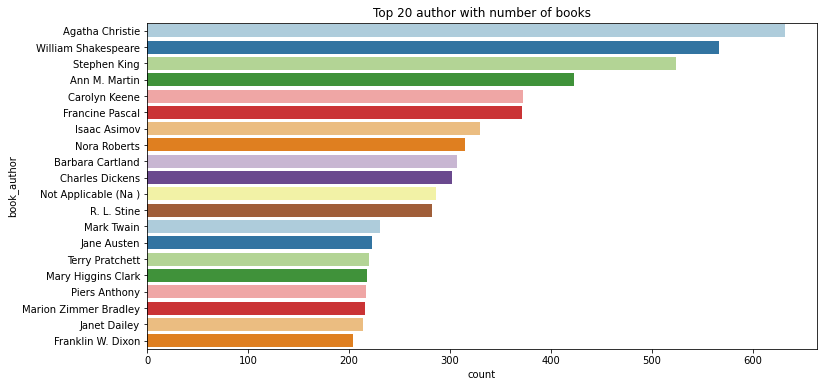

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=books,order=books['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

It can happen in some possible cases that Agatha Christie is not a best Author, though Agatha Christie has most number of books as compared to others.
William Shakespeare is one of the popular Author in the world. Still he doesn't have highest number of books.
Among all other Authors, it might happen that few of the Author might have some of the best seller books who have millions of copies been sold in world.
### Analysis no.2 -

Which are top publishers with published books

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

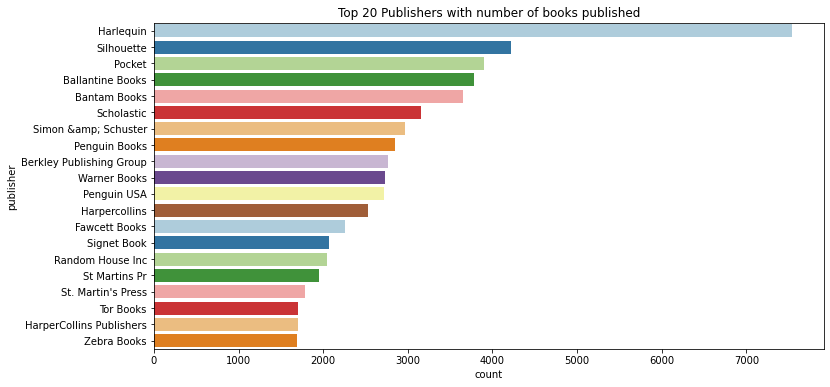

In [65]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=books,order=books['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

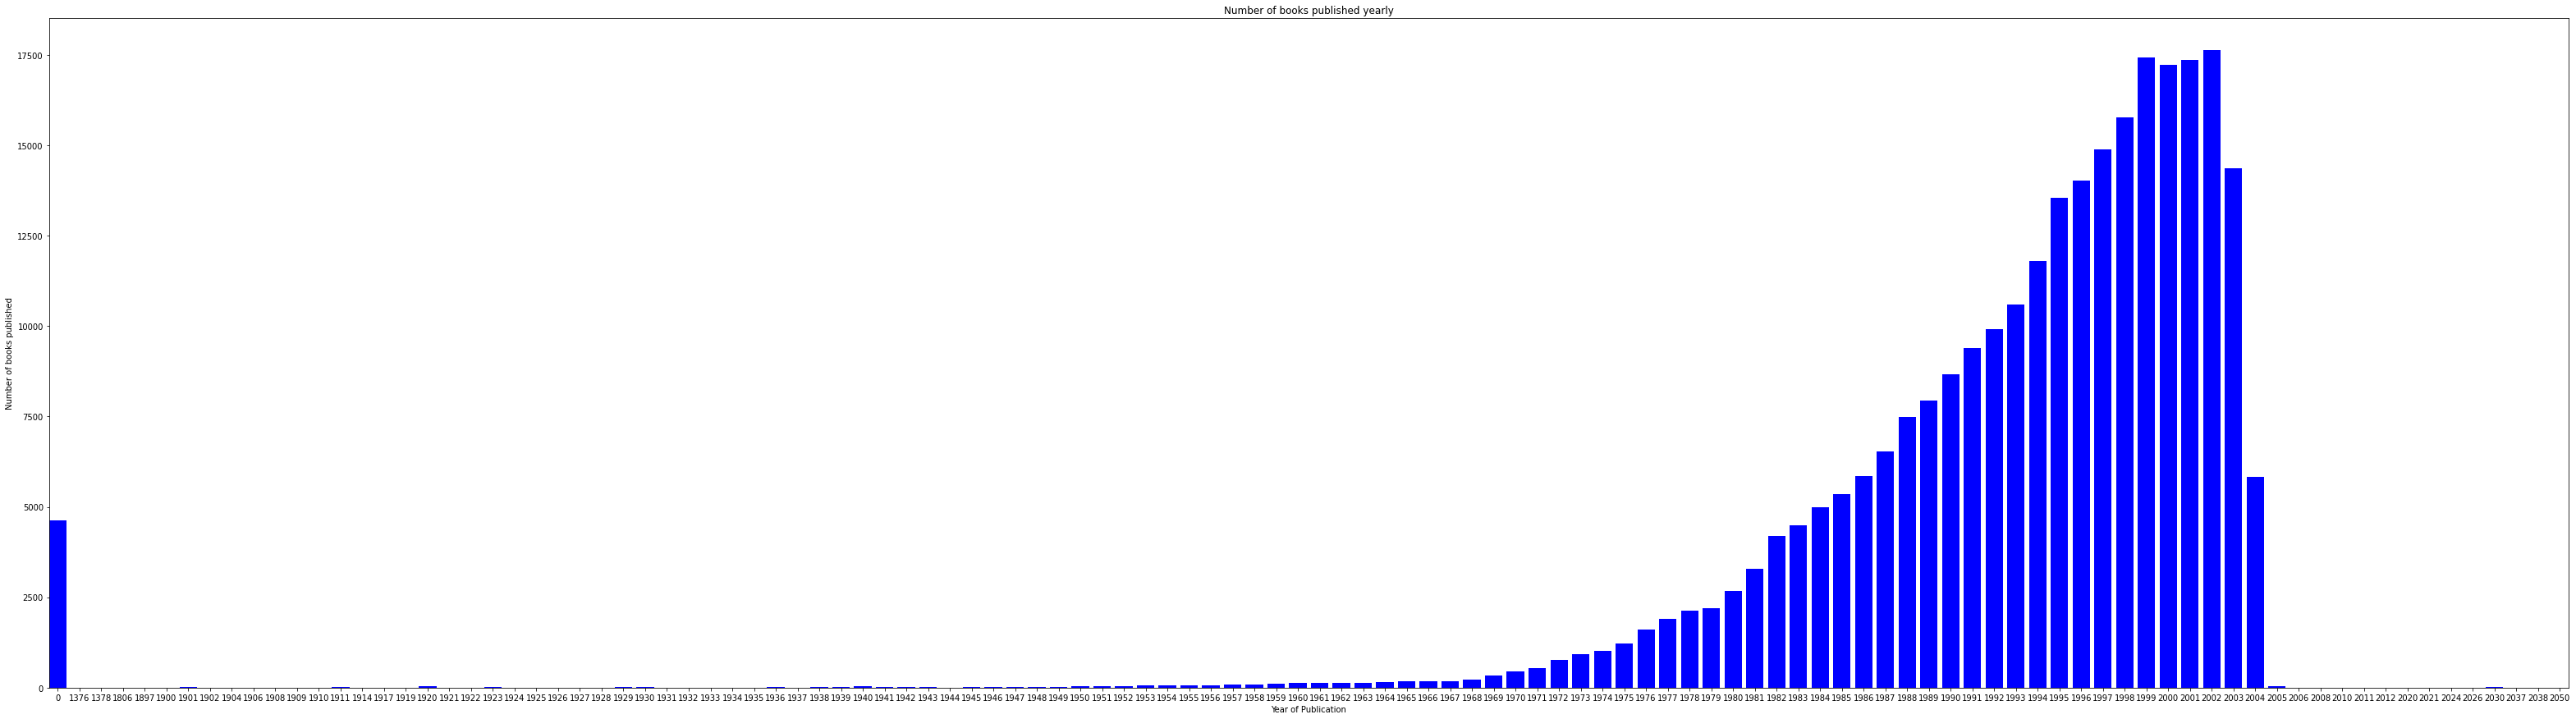

In [66]:
#Number of Books published in yearly.

publications = {}
for year in books['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [67]:
books.year_of_publication = pd.to_numeric(books.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = books[books.year_of_publication == 0].year_of_publication.count()
nan_year = books.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
books.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


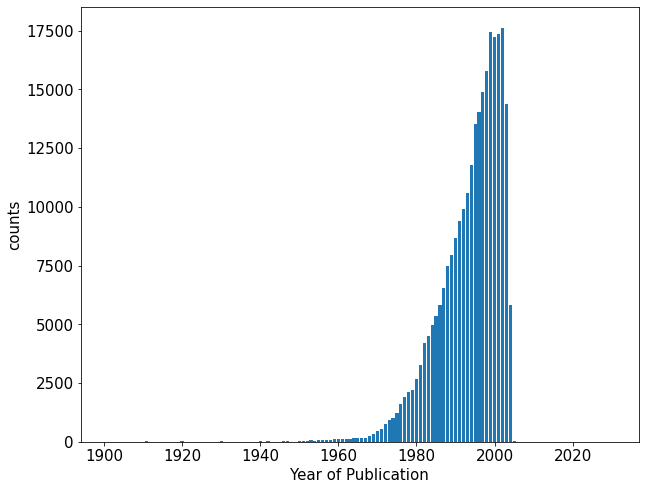

In [68]:
year = books.year_of_publication.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

So we can see publication years are somewhat between 1950 - 2005 here.The publication of books got vital when it starts emerging from 1950. We can get some hyothesis key points:-

It might happen people starts to understand the importance of books and gradually got productivity habits in their life.
Every user has their own taste to read books based on what particular subject Author uses. The subject of writing books got emerge from late 1940 slowly. Till 1970 it has got the opportunity to recommend books to people or users what they love to read.
The highest peak we can observe is between 1995-2001 year. The user understand what they like to read. Looking towards the raise the recommendation is also increase to understand their interest.

### User_data Dataset


Age distributions of users_data

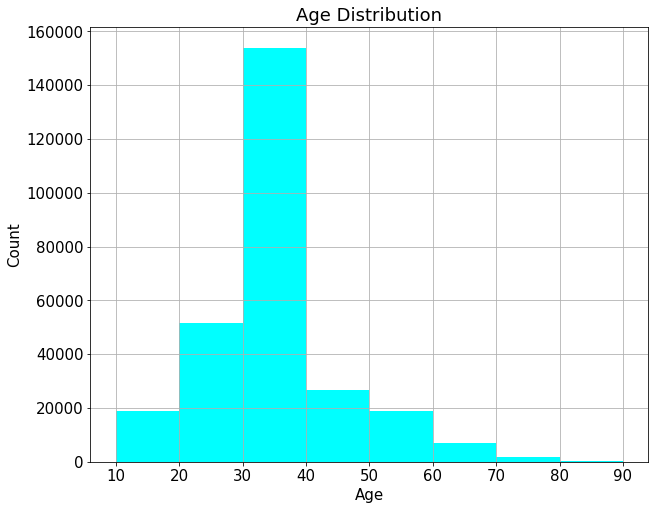

In [69]:
plt.figure(figsize=(10,8))
users.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

It is obvious that most of the user books are from Age 30 to 40.
It might happen that the users are more interested on that subject what Authors are publishing in the market.
The age group between 20-30 are immensely attracted to read books published by Author.
We can observe same pitch for Age group between 10-20 and 50-60. There are can be lot of different reasons.

### Ratings_data Dataset

What are top 20 books as per number of ratings 

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

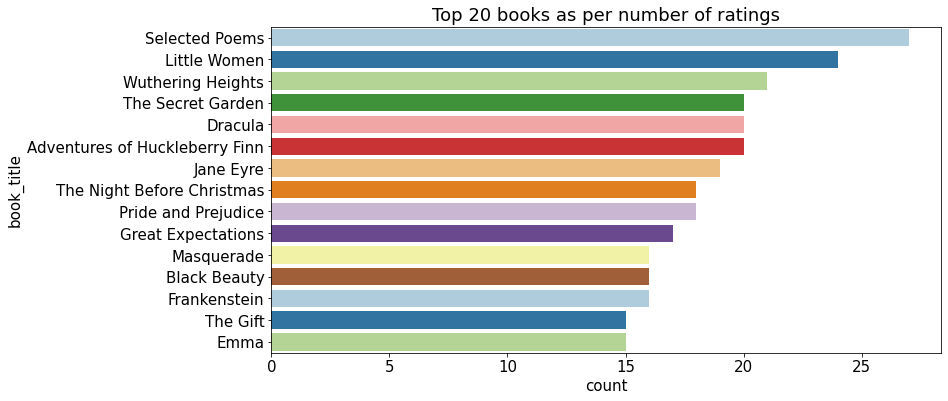

In [70]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= books, order=books['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

<AxesSubplot:xlabel='book_rating', ylabel='count'>

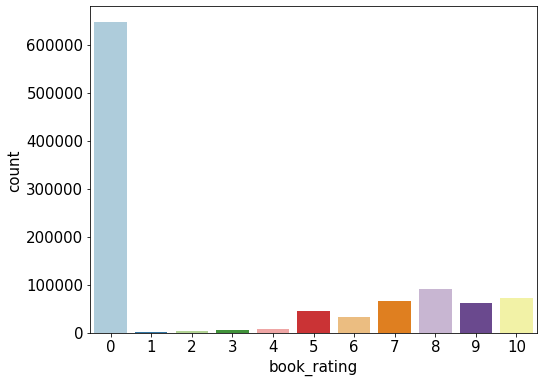

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Text(0.5, 1.0, 'Explicit Ratings')

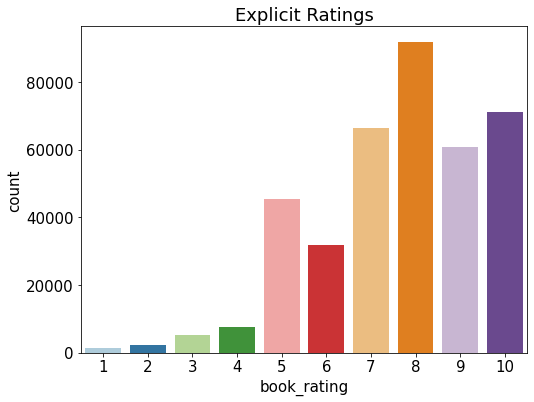

In [72]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

Popularity based Recommender System
Weighted average rating method

In [73]:
#finding the average rating and number of votes received by books
df_relevant_data = df.groupby(['book_title','book_author'],as_index=False).agg(avg_rating=('book_rating','mean'),ratings_count=('book_rating','count'))
v=df_relevant_data['ratings_count']
R=df_relevant_data['avg_rating']
C=df_relevant_data['avg_rating'].mean()
m=int(df_relevant_data['ratings_count'].quantile(0.90))#minimum number of votes to be listed
print(f'The average rating of all the books is {C} and the minimum number of votes required by the books to be listed is {m}  ')

The average rating of all the books is 7.522333493710074 and the minimum number of votes required by the books to be listed is 4  


In [74]:
#Calculating weighted average rating of the books
df_relevant_data['weighted_average']=round(((R*v)+ (C*m))/(v+m),2)
df_relevant_data.sort_values(by='weighted_average',ascending=False).head(10)

book_title  \
46517   Harry Potter and the Chamber of Secrets Postcard Book     
122278  The Two Towers (The Lord of the Rings, Part 2)            
30156   Dilbert: A Book of Postcards                              
81802   Postmarked Yesteryear: 30 Rare Holiday Postcards          
118238  The Return of the King (The Lord of the Rings, Part 3)    
17722   Calvin and Hobbes                                         
100960  The Authoritative Calvin and Hobbes (Calvin and Hobbes)   
72651   My Sister's Keeper : A Novel (Picoult, Jodi)              
118234  The Return of the King (The Lord of The Rings, Part 3)    
108875  The Giving Tree                                           

                       book_author  avg_rating  ratings_count  \
46517   J. K. Rowling               9.869565    23              
122278  J. R. R. Tolkien            9.653846    52              
30156   Scott Adams                 9.923077    13              
81802   Pamela E. Apkarian-Russell  10.000000   11              
118238  J.R.R. TOLKIEN              9.402597    77              
17722   Bill Watterson              9.583333    24              
100960  Bill Watterson              9.600000    20              
72651   Jodi Picoult                9.545455    22              
118234  J. R. R. Tolkien            9.625000    16              
108875  Shel Silverstein            9.423077    26              

        weighted_average  
46517   9.52              
122278  9.50              
30156   9.36              
81802   9.34              
118238  9.31              
17722   9.29              
100960  9.25              
72651   9.23              
118234  9.20              
108875  9.17

In [75]:
def author_based(book_title,number,df_relevant_data=df_relevant_data):
  '''
  To recommend books from the same author as the book entered by the user
  '''
  author=df_relevant_data.loc[df_relevant_data['book_title']==book_title]['book_author'].unique()[0]
  author_df=df_relevant_data.loc[(df_relevant_data['book_author']==author)].sort_values(by='weighted_average',ascending=False)
  print(f'The author of the book {book_title} is {author}\n')
  print(f'Here are the top {number} books from the same author\n')
  top_rec=author_df.loc[(author_df['book_title']!=book_title),['book_title','weighted_average']].head(number)
  return(top_rec)


In [76]:
#get book name and number of books to recommend
book_title = 'Harry Potter and the Chamber of Secrets (Book 2)'
number =5
author_based(book_title,number)
# top_recommendations from the same author

The author of the book Harry Potter and the Chamber of Secrets (Book 2) is J. K. Rowling

Here are the top 5 books from the same author



book_title  weighted_average
46517  Harry Potter and the Chamber of Secrets Postcard Book  9.52            
46521  Harry Potter and the Goblet of Fire (Book 4)           9.11            
46525  Harry Potter and the Order of the Phoenix (Book 5)     9.04            
46540  Harry Potter and the Sorcerer's Stone (Book 1)         9.03            
46533  Harry Potter and the Prisoner of Azkaban (Book 3)      9.02

### Collaborative filtering
Collaborative filtering techniques create a model based on past user activity (items previously purchased, movies viewed and rated, etc.) as well as usage choices made by both current and past users. Then, this model is used to predict the ratings for items or items themselves that the user might be interested in.

## Model Based Approach
1. Singular Value Decomposition

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import random
import math

In [79]:
#Filtering books with more than 5 reviews

print('The number of books that are explicitely rated are',explicit_rating['isbn'].nunique())
ratings_count_df=explicit_rating.groupby("isbn")['user_id'].count().to_frame('No-of-rated-users').reset_index()
selected_books =list(ratings_count_df.loc[ratings_count_df['No-of-rated-users']>5,'isbn'].unique())
print('Number of  books rated by atleast 5 users:',len(selected_books))
filter_df=explicit_rating.loc[explicit_rating['isbn'].isin(selected_books)]

The number of books that are explicitely rated are 149836
Number of  books rated by atleast 5 users: 10731


In [80]:
#keeping books with selected users
print('The number of users who have explicitely rated books are',explicit_rating['user_id'].nunique())

#keeps Users who have rated more than five books
books_count_df=filter_df.groupby("user_id")['isbn'].count().to_frame('No-of-books-rated').reset_index()
selected_users = list(books_count_df.loc[books_count_df['No-of-books-rated']>5,'user_id'].unique())
print('Number of  users who have rated atleast 5 books are :',len(selected_users))

#dataframe with filtered number of interactions
filter_df=filter_df.loc[filter_df['user_id'].isin(selected_users)]
print('The shape of data fame with filtered number of interactions : ',filter_df.shape)

The number of users who have explicitely rated books are 68091
Number of  users who have rated atleast 5 books are : 5911
The shape of data fame with filtered number of interactions :  (114147, 3)


In [81]:
complete_df = filter_df.copy()
complete_df['book_rating'].describe()

count    114147.000000
mean     7.816728     
std      1.774365     
min      1.000000     
25%      7.000000     
50%      8.000000     
75%      9.000000     
max      10.000000    
Name: book_rating, dtype: float64

In [82]:
def smooth_user_preference(x):
    '''Function to smooth column'''
    return math.log(1+x, 2)
#applying function
complete_df['book_rating']= complete_df['book_rating'].apply(smooth_user_preference)
complete_df.head()

user_id        isbn  book_rating
177  276847   3404148576  3.169925   
179  276847   3423071516  3.459432   
186  276847   3442413508  3.459432   
189  276847   3442437717  3.000000   
190  276847   3442441080  3.459432

In [83]:
train_df, test_df = train_test_split(complete_df,
                                   stratify=complete_df['user_id'], 
                                   test_size=0.20,
                                   random_state=0)

print('# interactions on Train set: %d' % len(train_df))
print('# interactions on Test set: %d' % len(test_df))

# interactions on Train set: 91317
# interactions on Test set: 22830


In [84]:
#displaying the first 5 rows of test set
test_df.head()

user_id        isbn  book_rating
595435   143415   0804117683  2.584963   
1129708  271195   0061091502  3.169925   
921324   224430   0446675059  3.321928   
963425   232492   0553580191  3.459432   
415865   98783    0553290797  3.169925

In [85]:
#Creating a sparse pivot table with users in rows and ISBN number of books in columns
users_books_pivot_matrix_df = train_df.pivot(index='user_id', 
                                                          columns='isbn', 
                                                          values='book_rating').fillna(0)

users_books_pivot_matrix_df.head()
     

isbn     0002005018  0002251760  0002259834  0002558122  0006480764  \
user_id                                                               
114      0.0         0.0         0.0         0.0         0.0          
243      0.0         0.0         0.0         0.0         0.0          
244      0.0         0.0         0.0         0.0         0.0          
254      0.0         0.0         0.0         0.0         0.0          
388      0.0         0.0         0.0         0.0         0.0          

isbn     000648302X  000649840X  0006546684  0006547834  0006550576  \
user_id                                                               
114      0.0         0.0         0.0         0.0         0.0          
243      0.0         0.0         0.0         0.0         0.0          
244      0.0         0.0         0.0         0.0         0.0          
254      0.0         0.0         0.0         0.0         0.0          
388      0.0         0.0         0.0         0.0         0.0          

isbn     0006550789  0006551971  0006742939  0007110928  0007122039  \
user_id                                                               
114      0.0         0.0         0.0         0.0         0.0          
243      0.0         0.0         0.0         0.0         0.0          
244      0.0         0.0         0.0         0.0         0.0          
254      0.0         0.0         0.0         0.0         0.0          
388      0.0         0.0         0.0         0.0         0.0          

isbn     0007141076  0007154615  000716226X  0007170866  0020125305  \
user_id                                                               
114      0.0         0.0         0.0         0.0         0.0          
243      0.0         0.0         0.0         0.0         0.0          
244      0.0         0.0         0.0         0.0         0.0          
254      0.0         0.0         0.0         0.0         0.0          
388      0.0         0.0         0.0         0.0         0.0          

isbn     0020198817  0020198906  0020199600  002026478X  0020306652  \
user_id                                                               
114      0.0         0.0         0.0         0.0         0.0          
243      0.0         0.0         0.0         0.0         0.0          
244      0.0         0.0         0.0         0.0         0.0          
254      0.0         0.0         0.0         0.0         0.0          
388      0.0         0.0         0.0         0.0         0.0          

isbn     0020360754  0020418809  0020427859  0020442009  0020442106  \
user_id                                                               
114      0.0         0.0         0.0         0.0         0.0          
243      0.0         0.0         0.0         0.0         0.0          
244      0.0         0.0         0.0         0.0         0.0          
254      0.0         0.0         0.0         0.0         0.0          
388      0.0         0.0         0.0         0.0         0.0          

isbn     0020442203  0020442300  0020442408  0020442505  0020442602  \
user_id                                                               
114      0.0         0.0         0.0         0.0         0.0          
243      0.0         0.0         0.0         0.0         0.0          
244      0.0         0.0         0.0         0.0         0.0          
254      0.0         0.0         0.0         0.0         0.0          
388      0.0         0.0         0.0         0.0         0.0          

isbn     0020446500  0020449313  0020518501  0020518609  0020518706  \
user_id                                                               
114      0.0         0.0         0.0         0.0         0.0          
243      0.0         0.0         0.0         0.0         0.0          
244      0.0         0.0         0.0         0.0         0.0          
254      0.0         0.0         0.0         0.0         0.0          
388      0.0         0.0         0.0         0.0         0.0          

isbn     0020519

In [86]:
#Creating a matrix with the values of users_books_pivot_matrix_df
original_ratings_matrix = users_books_pivot_matrix_df.values
original_ratings_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
#Storing the User-IDs in a list
user_ids = list(users_books_pivot_matrix_df.index)
user_ids[:10]

[114, 243, 244, 254, 388, 446, 503, 505, 507, 638]

In [88]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 20

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(original_ratings_matrix, k = NUMBER_OF_FACTORS_MF)

In [89]:
#converting sigma to a diagonal matrix
sigma = np.diag(sigma)

In [90]:
#Rating matric reconstructed using the matrices obtained after factorizing
predicted_ratings_matrix = np.dot(np.dot(U, sigma), Vt) 
predicted_ratings_matrix 

array([[-4.04258460e-03,  5.55244996e-03,  3.55055121e-04, ...,
         1.50895745e-03,  2.40835026e-03, -4.47942990e-04],
       [ 2.39738748e-03,  7.31390062e-03,  1.06721793e-03, ...,
         2.41422467e-03, -2.50155111e-03,  7.07560167e-04],
       [ 2.76172022e-03,  2.46976045e-03,  3.93502515e-04, ...,
         7.51697062e-05, -3.15196343e-04,  4.15219598e-04],
       ...,
       [-3.77213135e-03,  4.35044249e-03,  7.91362149e-04, ...,
        -1.50838380e-03,  3.13716934e-04,  7.99373179e-05],
       [-9.99820694e-04, -5.55826794e-03, -1.68973261e-04, ...,
        -2.70869693e-04, -2.11730260e-03,  7.02884677e-03],
       [ 3.24745355e-03,  2.10480356e-03, -1.81779252e-04, ...,
        -3.05056878e-03, -1.71475791e-04,  2.70358799e-04]])

In [91]:
#Converting the reconstructed matrix back to a Pandas dataframe
predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix , columns = users_books_pivot_matrix_df.columns, index=user_ids).transpose()
predicted_ratings_df.head()

114       243       244       254       388       446  \
isbn                                                                     
0002005018 -0.004043  0.002397  0.002762 -0.003667 -0.000216 -0.000260   
0002251760  0.005552  0.007314  0.002470  0.021147  0.000592  0.000613   
0002259834  0.000355  0.001067  0.000394  0.002019  0.000052  0.000053   
0002558122 -0.003808 -0.003172  0.001659 -0.004843 -0.000196 -0.000568   
0006480764 -0.000063  0.002744  0.000518  0.000504 -0.000052  0.000107   

                 503       505       507       638       643       651  \
isbn                                                                     
0002005018  0.002452 -0.000518  0.004893  0.013587  0.003929  0.004098   
0002251760  0.002472  0.004229  0.003706  0.015128  0.000385  0.000087   
0002259834  0.000451 -0.000140  0.000439  0.000354  0.000035  0.000214   
0002558122  0.001098 -0.000394  0.002326  0.013740  0.003877  0.004089   
0006480764  0.000705 -0.000046  0.000544  0.008970  0.000030  0.000094   

                 709       735       805       834       882       929  \
isbn                                                                     
0002005018 -0.001442  0.002280  0.006464 -0.000061  0.003290  0.003921   
0002251760 -0.005579  0.000185  0.011870  0.000338  0.029078  0.004415   
0002259834 -0.000534  0.000088  0.001202  0.000037  0.002108  0.000287   
0002558122 -0.000670  0.002249  0.002641 -0.000197  0.000532  0.003302   
0006480764  0.004227  0.000009  0.002036  0.000097  0.001426 -0.000147   

                1025      1075      1131      1155      1167      1211  \
isbn                                                                     
0002005018  0.003171 -0.003044  0.000316 -0.001073  0.002137  0.000938   
0002251760  0.005576  0.012257 -0.000462  0.000128 -0.000586  0.018466   
0002259834  0.000778  0.000841  0.000518 -0.000026  0.000017  0.001109   
0002558122  0.001696 -0.005171 -0.002351 -0.000901  0.002399  0.000512   
0006480764  0.001119  0.007011  0.001221  0.000099  0.000055 -0.000005   

                1412      1424      1435      1548      1585      1660  \
isbn                                                                     
0002005018  0.001721  0.008024  0.003532  0.002439  0.001772  0.002074   
0002251760  0.005748  0.008611  0.007281  0.006778  0.000226 -0.000841   
0002259834  0.000611  0.001245  0.000756  0.000655 -0.000036 -0.000039   
0002558122  0.001026  0.004587 -0.000374 -0.000030  0.002475  0.001993   
0006480764  0.000998  0.001542  0.002454  0.000880 -0.000213 -0.000085   

                1674      1733      1848      1903      2010      2012  \
isbn                                                                     
0002005018  0.007177  0.003470  0.007004  0.001821  0.002894  0.001584   
0002251760  0.004294 -0.005098  0.004818  0.001483  0.000825  0.003059   
0002259834  0.000197 -0.000921  0.001256  0.000204 -0.000003  0.000528   
0002558122  0.006892  0.003613  0.004791  0.001892  0.002872  0.000577   
0006480764  0.000174 -0.001147  0.000916 -0.000079 -0.000056  0.000731   

                2030      2033      2041      2110      2139      2179  \
isbn                                                                     
0002005018  0.003546 -0.008919  0.002027  0.004675  0.005306 -0.003472   
0002251760  0.002079  0.002893  0.002235 -0.000653  0.000114  0.011132   
0002259834  0.000438  0.002299  0.000017  0.000243  0.000052  0.001135   
0002558122  0.002958 -0.005331  0.001979  0.005682  0.005202 -0.003678   
0006480764  0.000537  0.001014 -0.000131 -0.000010  0.000307  0.000577   

                2276      2287      2288      2313      2337      2358  \
isbn                                                                     
0002005018  0.006811  0.002393  0.002758 -0.000518 -0.003466  0.000761   
0002251760 -0.006472 -0.000115 -0.001088  0.004029  0.006019  0.001817   
0002259834  0.000342 -0.000044  0.000037  0.000469  0.000970  0.000157   
0002558122  0.